# Implied Volatility and Volatility Models

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Load the Libs we need

In [1]:
# import Lib
import pandas as pd
import datetime as dt
import pytz
import os
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import scipy.stats as si
import math
import networkx as nx

# import module
from datetime import datetime, timezone
from datetime import date, time
from math import trunc
from dateutil.parser import parse

## Overview of Volatility Models illustration

### Black-Scholes Model

In [2]:
import numpy as np
from scipy.stats import norm

# Define the parameters
S = 145  # Current stock price
K = 150  # Strike price
r = 0.02  # Risk-free interest rate
sigma = 0.20  # Volatility
T = 0.5  # Time to expiration in years

# Calculate d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculate call price
call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
print(f'The Black-Scholes price for the European call option is: ${call_price:.2f}')


The Black-Scholes price for the European call option is: $6.64


### Generalized Autoregressive Conditional Heteroskedasticity (GARCH) Models

In [3]:
import yfinance as yf
import pandas as pd
from arch import arch_model

# Download historical data for desired ticker symbol
ticker = 'AAPL'
data = yf.download(ticker, start="2020-01-01", end="2023-07-01")

# Calculate daily returns
data['returns'] = data['Close'].pct_change().dropna()

# Define the GARCH model
model = arch_model(data['returns'].dropna(), vol='Garch', p=1, q=1)

# Fit the model
results = model.fit()

# Print out the summary information on the fit and the model
print(results.summary())



[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 622672773.416352
Iteration:      2,   Func. Count:     18,   Neg. LLF: 15772719.973315518
Iteration:      3,   Func. Count:     30,   Neg. LLF: 14610445.528316265
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2198.8673911072524
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2198.87
Distribution:                  Normal   AIC:                          -4389.73
Method:            Maximum Likelihood   BIC:                          -4370.62
                               

C:\Users\mbettaiebcapbonconsu\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004907. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


### Stochastic Volatility Models

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\mbettaiebcapbonconsu\anaconda3\envs\myenv\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\mbettaiebcapbonconsu\anaconda3\envs\myenv\lib\site-packages\theano\tensor\elemwise.py:826

Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 10035 seconds.
The acceptance probability does not match the target. It is 0.6570786377854854, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.03551770376621181, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\mbettaiebcapbonconsu\AppData\Local\Temp\ipykernel_16244\3187761711.py:30: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, var_names=['sigma', 'nu'])
Got error No mode

array([[<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'nu'}>, <Axes: title={'center': 'nu'}>]],
      dtype=object)

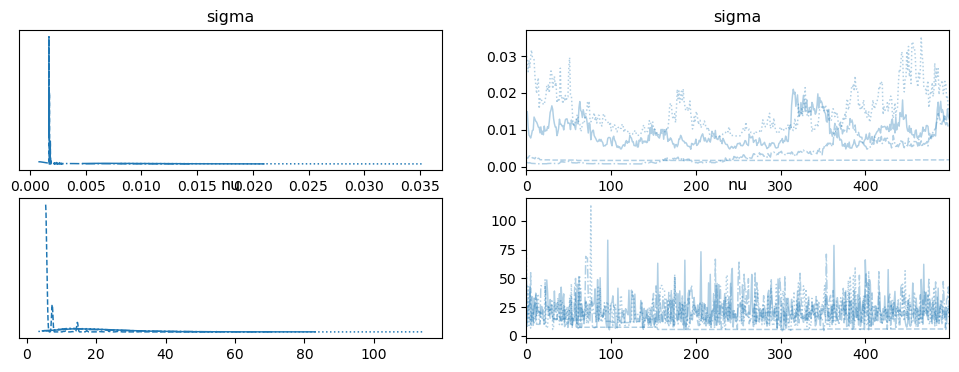

In [5]:
""" Too Long to run

import numpy as np
import pandas as pd
import pymc3 as pm
import theano

# Set Theano configuration
theano.config.cxx = ""

# Set a seed for reproducibility
np.random.seed(123)

# Create a pandas series of 100 random values
returns = pd.Series(np.random.randn(100))

# Define the model
model = pm.Model()

with model:
    sigma = pm.Exponential('sigma', 1. / .02, testval=.1)
    nu = pm.Exponential('nu', 1. / 10)
    s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2 * s))
    r = pm.StudentT('r', nu=nu, sd=volatility_process, observed=returns)

# Sample from the model
with model:
    trace = pm.sample(500)  # Now drawing 500 samples instead of 2000

# Plot the results
pm.traceplot(trace, var_names=['sigma', 'nu'])

"""

## Calculating Implied Volatility Using Python

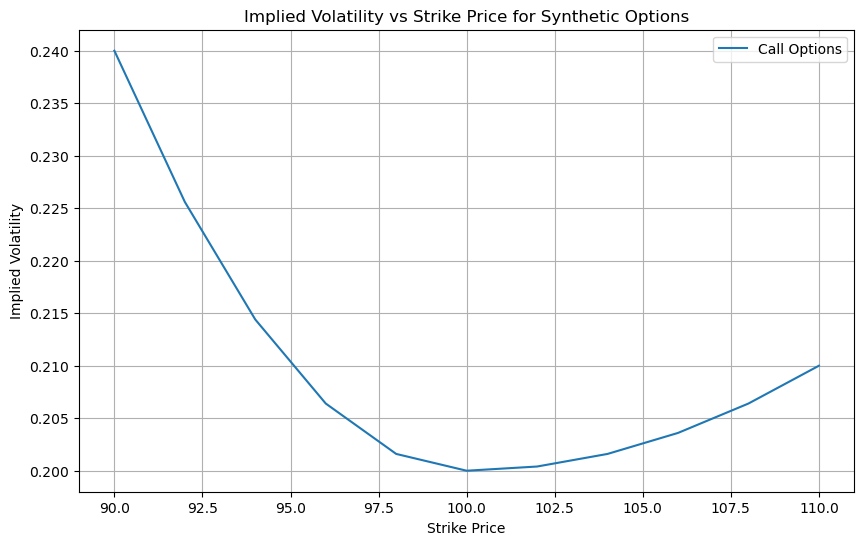

In [18]:
import pandas as pd
import numpy as np
from scipy.optimize import brentq
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the Black-Scholes price calculation
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        price = (S * norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        price = (K * np.exp(-r * T) * norm.cdf(-d2, 0.0, 1.0) - S * norm.cdf(-d1, 0.0, 1.0))
    return price

# Constants for Black-Scholes price calculation
spot_price = 100  # current price of the underlying asset
T = 30 / 365  # time to expiry in years
risk_free_rate = 0.01  # risk-free interest rate

# Range of strike prices
strike_prices = np.linspace(90, 110, 11)  # 11 points between 90 and 110

# A skewed implied volatility function that is convex and asymmetric
def skewed_volatility(K):
    if K < spot_price:
        return 0.2 + ((spot_price - K) / 50) ** 2
    else:
        return 0.2 + ((K - spot_price) / 100) ** 2

# Synthetic market prices
market_prices = [black_scholes_price(spot_price, K, T, risk_free_rate, skewed_volatility(K), 'call') for K in strike_prices]

# Dataframe for our synthetic options
options_df = pd.DataFrame({'strike': strike_prices, 'market_price': market_prices})

# Define the implied volatility calculation
def implied_volatility(market_price, S, K, T, r, option_type='call'):
    def price_diff(sigma):
        return black_scholes_price(S, K, T, r, sigma, option_type) - market_price
    iv = brentq(price_diff, 1e-6, 2)
    return iv

# Calculate implied volatility for each strike price
options_df['ImpliedVolatility'] = options_df.apply(lambda row: implied_volatility(row['market_price'], spot_price, row['strike'], T, risk_free_rate, 'call'), axis=1)

# Plot implied volatility
plt.figure(figsize=(10, 6))
plt.plot(options_df['strike'], options_df['ImpliedVolatility'], label='Call Options')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs Strike Price for Synthetic Options')
plt.legend()
plt.grid(True)
plt.show()


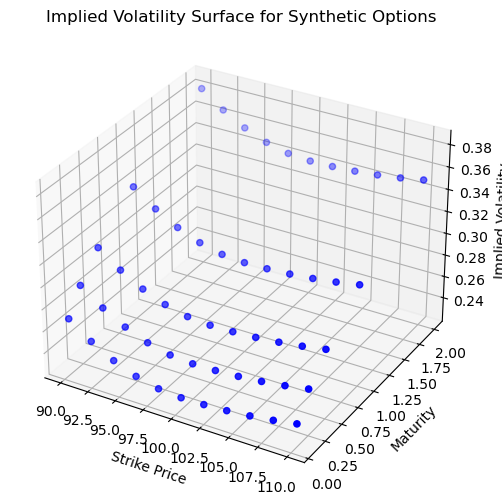

In [19]:
import pandas as pd
import numpy as np
from scipy.optimize import brentq
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants for Black-Scholes price calculation
spot_price = 100  # current price of the underlying asset
risk_free_rate = 0.01  # risk-free interest rate

# Range of strike prices and maturities
strike_prices = np.linspace(90, 110, 11)  # 11 points between 90 and 110
maturities = np.array([1/12, 3/12, 6/12, 12/12, 24/12])  # in years

# A skewed implied volatility function that is convex and asymmetric and increases with time
def skewed_volatility(K, T):
    base_vol = 0.2 + 0.1 * (T ** 0.5)
    if K < spot_price:
        return base_vol + ((spot_price - K) / 50) ** 2
    else:
        return base_vol + ((K - spot_price) / 100) ** 2

# Synthetic market prices for different maturities
options_df = pd.DataFrame([(K, T, black_scholes_price(spot_price, K, T, risk_free_rate, skewed_volatility(K, T), 'call')) 
                           for K in strike_prices for T in maturities], 
                          columns=['strike', 'maturity', 'market_price'])

# Calculate implied volatility for each strike price and maturity
options_df['ImpliedVolatility'] = options_df.apply(lambda row: implied_volatility(row['market_price'], spot_price, row['strike'], row['maturity'], risk_free_rate, 'call'), axis=1)

# 3D Plot implied volatility
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(options_df['strike'], options_df['maturity'], options_df['ImpliedVolatility'], c='b', marker='o')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
plt.title('Implied Volatility Surface for Synthetic Options')
plt.show()


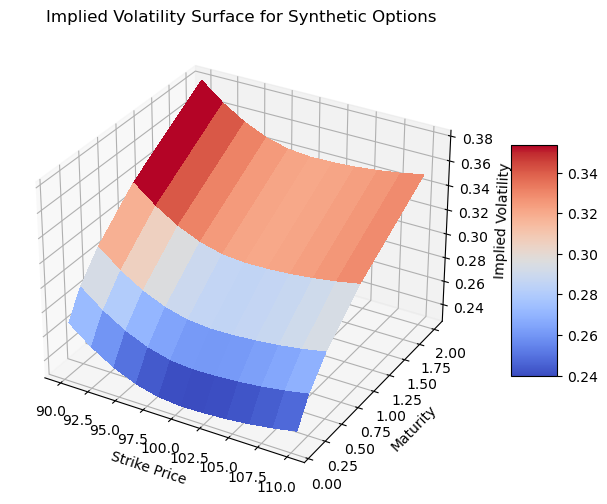

In [20]:
import pandas as pd
import numpy as np
from scipy.optimize import brentq
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Constants for Black-Scholes price calculation
spot_price = 100  # current price of the underlying asset
risk_free_rate = 0.01  # risk-free interest rate

# Range of strike prices and maturities
strike_prices = np.linspace(90, 110, 11)  # 11 points between 90 and 110
maturities = np.array([1/12, 3/12, 6/12, 12/12, 24/12])  # in years

# A skewed implied volatility function that is convex and asymmetric and increases with time
def skewed_volatility(K, T):
    base_vol = 0.2 + 0.1 * (T ** 0.5)
    if K < spot_price:
        return base_vol + ((spot_price - K) / 50) ** 2
    else:
        return base_vol + ((K - spot_price) / 100) ** 2

# Synthetic market prices for different maturities
options_df = pd.DataFrame([(K, T, black_scholes_price(spot_price, K, T, risk_free_rate, skewed_volatility(K, T), 'call')) 
                           for K in strike_prices for T in maturities], 
                          columns=['strike', 'maturity', 'market_price'])

# Calculate implied volatility for each strike price and maturity
options_df['ImpliedVolatility'] = options_df.apply(lambda row: implied_volatility(row['market_price'], spot_price, row['strike'], row['maturity'], risk_free_rate, 'call'), axis=1)

# Create a grid of strike prices and maturities
K, T = np.meshgrid(strike_prices, maturities)

# Interpolate implied volatility onto grid
IV = griddata((options_df['strike'], options_df['maturity']), options_df['ImpliedVolatility'], (K, T), method='cubic')

# 3D Plot implied volatility
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(K, T, IV, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Maturity')
ax.set_zlabel('Implied Volatility')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Implied Volatility Surface for Synthetic Options')
plt.show()
